In [2]:
# couchdb_settings
address = '172.26.134.35:5984' 
username = 'grp5admin'
password = 'password'
tweets = 'raw_tweets'
user = 'user_list'
birth_country = 'birthcountry'
lang_code = 'langcode'
home_lang = 'homelang'

In [11]:
from collections import defaultdict, Counter
import couchdb
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
def fetch_DB(dbname):
    """
    connect to CouchDB
    params: name of the database to connect to
    return: the db to establish connection with
    return type: database
    """
    
    db = couchdb.Database('http://' + address + '/' + dbname)
    db.resource.credentials = (username, password)

    return db

In [6]:
tweet_db = fetch_DB(tweets)

In [20]:
yearly_hashtag = {}
for item in tweet_db.view('hashtags/by-year'):
    if item.key not in yearly_hashtag.keys():
        yearly_hashtag[item.key] = list(item.value)
    else:
        yearly_hashtag[item.key].append(item.value) 

for k, v in yearly_hashtag.items():
    yearly_hashtag[k] = Counter(v)  
    
for k, v in yearly_hashtag.items():
    yearly_hashtag[k] = v.most_common(20)

In [ ]:
yearly_hashtag

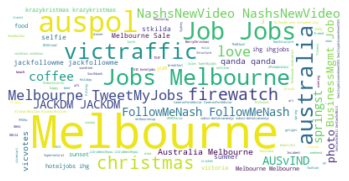

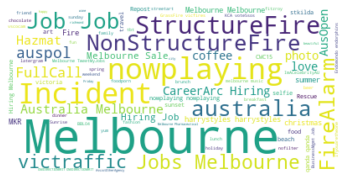

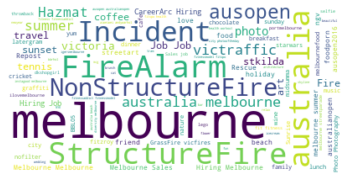

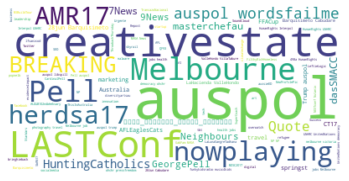

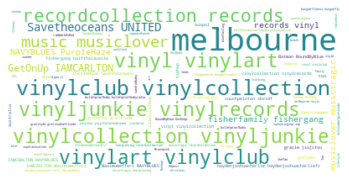

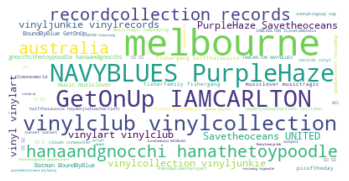

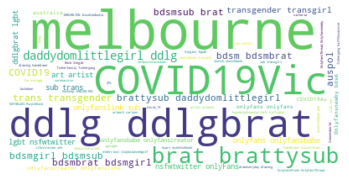

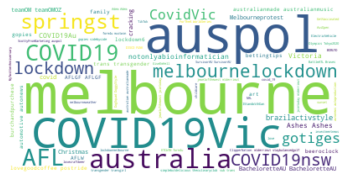

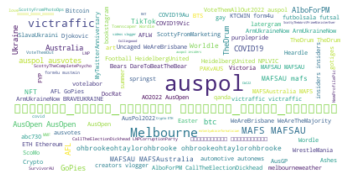

In [17]:
wc = WordCloud(background_color="white", max_words=100)

for v in yearly_hashtag.values():
	clean_string = ','.join(v)
	plt.imshow(wc.generate(clean_string), interpolation='bilinear')
	plt.axis("off")
	plt.show()

In [54]:
geos_tweets = defaultdict(list)
for item in tweet_db.view('geo/coordinates-tweet-1'):
    geos_tweets[str(item.key)].append(item.value) 

for item in tweet_db.view('geo/coordinates-tweet-2'):
    geos_tweets[str(item.key)].append(item.value) 

In [55]:
geos_count1 = defaultdict()
geos_count2 = defaultdict()

for item in tweet_db.view('geo/coordinates-count-1', group = True):
    geos_count1[str(item.key)] = item.value


for item in tweet_db.view('geo/coordinates-count-2', group = True):
    geos_count2[str(item.key)] = item.value

geos_count = (Counter(geos_count1) + Counter(geos_count2)).most_common(500)

geos_count = dict(geos_count)

In [58]:
geos_count

{'[144.94388889, -37.79611111]': 22620,
 '[144.9661, -37.8156]': 10269,
 '[144.92194444, -37.79305556]': 3870,
 '[144.967, -37.8167]': 3536,
 '[144.963, -37.8143]': 2751,
 '[145.05, -37.97638889]': 1865,
 '[144.9629796, -37.8131869]': 1776,
 '[145.20643, -37.986289]': 1730,
 '[145.21569729, -37.81778517]': 796,
 '[144.99567, -37.83759]': 773,
 '[145.1163, -38.0477]': 754,
 '[144.7393646, -37.8993225]': 618,
 '[144.98248, -37.8064899]': 584,
 '[145.2664, -37.8404]': 537,
 '[145.0032, -37.8215]': 460,
 '[145.22382, -37.83182]': 454,
 '[145.10127, -37.86511]': 433,
 '[144.95714, -37.81691]': 426,
 '[145.00142, -37.82589]': 416,
 '[145.36748, -38.04368]': 406,
 '[144.77623246, -37.79469826]': 403,
 '[144.9861145, -37.87277603]': 385,
 '[145.05588055, -37.73140425]': 365,
 '[144.9630576, -37.8136276]': 349,
 '[144.98348577, -37.81981833]': 344,
 '[144.848394, -37.686804]': 340,
 '[144.96681, -37.818078]': 340,
 '[145.0537, -37.9206]': 340,
 '[144.84896421, -37.66987719]': 338,
 '[144.776137

In [62]:
geos_tweets = {k2: v1 for k2 in geos_count.keys() for k1, v1 in geos_tweets.items() if k1 == k2}

In [65]:
geos_tweets

{'[144.94388889, -37.79611111]': ['Wind 4,8 m/s WNW. Barometer 1007,2 hPa, Falling. Temperature 11,9 A2�C. Rain today 0,0 mm. Humidity 45%',
  'Wind 2,7 m/s WNW. Barometer 1007,2 hPa, Falling. Temperature 11,5 A2�C. Rain today 0,0 mm. Humidity 45%',
  'Wind 2,0 m/s WNW. Barometer 1007,1 hPa, Falling. Temperature 11,4 A2�C. Rain today 0,0 mm. Humidity 46%',
  'Wind 1,7 m/s WNW. Barometer 1007,1 hPa, Falling. Temperature 11,5 A2�C. Rain today 0,0 mm. Humidity 47%',
  'Wind 5,1 m/s WNW. Barometer 1007,0 hPa, Falling. Temperature 11,5 A2�C. Rain today 0,0 mm. Humidity 46%',
  'Wind 3,7 m/s WNW. Barometer 1007,0 hPa, Falling. Temperature 11,4 A2�C. Rain today 0,0 mm. Humidity 46%',
  'Wind 2,7 m/s WNW. Barometer 1006,9 hPa, Falling. Temperature 11,4 A2�C. Rain today 0,0 mm. Humidity 47%',
  'Wind 3,4 m/s WNW. Barometer 1006,9 hPa, Falling. Temperature 11,4 A2�C. Rain today 0,0 mm. Humidity 47%',
  'Wind 2,4 m/s WNW. Barometer 1006,5 hPa, Falling. Temperature 11,4 A2�C. Rain today 0,0 mm. Hu